In [86]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [87]:
def read_csv(file):
    return pd.read_csv(file)

def cleanup_data(data):
    # remove games when he didn't play
    data = data.drop(data[data.G.isnull()].index)

    # normalize age to years
    data['Age'] = data['Age'].str.split('-', 1).str[0].astype(int)

    # normalize minutes to exclude seconds
    data['MP'] = data["MP"].str.split(":").str[0].astype(int)
    
    data['PTS'] = data['PTS'].astype(int)
    return data

def read_and_clean_csv(file, columns=[]):
    data = read_csv(file)
    clean_data = cleanup_data(data)
    return clean_data[columns]

csv_label_name = "PTS" # points per game "+/-"
feature_names = ["G", "MP", "Age"]
csv_column_names = feature_names + [csv_label_name]

feature_columns = [
    tf.feature_column.numeric_column(feature) for feature in feature_names
]

def read_seasons(seasons=range(2002, 2018)):
    stats = []
    for season in seasons:
        file = str(season) + ".csv"
        season_stat = read_and_clean_csv(file, columns=csv_column_names)
        stats.append(season_stat)
    return pd.concat(stats)

stats = read_seasons()
train_factor = 0.8
train, test = stats[:int(len(stats)*train_factor)], stats[int(len(stats)*train_factor):]

In [88]:
print("test:" + str(test.shape) + " train: " + str(train.shape) + " stats: " + str(stats.shape))

test:(212, 4) train: (845, 4) stats: (1057, 4)


In [89]:
input_fn_train = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : train["Age"].values,
        "MP" : train["MP"].values,
        "G" : train["G"].values
    }),
    y = pd.Series(train.PTS.values),
    shuffle=False,
    num_epochs=20000
)

In [90]:
estimator = tf.estimator.DNNRegressor(hidden_units=[5, 5], feature_columns=feature_columns)
# estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119d64a90>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmp6aleB_', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [91]:
# train
estimator.train(input_fn=input_fn_train, steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmp6aleB_/model.ckpt.
INFO:tensorflow:loss = 11780.277, step = 1
INFO:tensorflow:global_step/sec: 483.334
INFO:tensorflow:loss = 4870.778, step = 101 (0.211 sec)
INFO:tensorflow:global_step/sec: 542.573
INFO:tensorflow:loss = 5737.624, step = 201 (0.182 sec)
INFO:tensorflow:global_step/sec: 567.927
INFO:tensorflow:loss = 6592.8374, step = 301 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.549
INFO:tensorflow:loss = 4664.8516, step = 401 (0.178 sec)
INFO:tensorflow:global_step/sec: 551.746
INFO:tensorflow:loss = 3528.5503, step = 501 (0.181 sec)
INFO:tensorflow:global_step/sec: 576.426
INFO:tensorflow:loss = 3874.3115, step = 601 (0.174 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 4245.5166, step = 8001 (0.166 sec)
INFO:tensorflow:global_step/sec: 512.004
INFO:tensorflow:loss = 4224.4185, step = 8101 (0.194 sec)
INFO:tensorflow:global_step/sec: 457.153
INFO:tensorflow:loss = 4763.1113, step = 8201 (0.219 sec)
INFO:tensorflow:global_step/sec: 488.945
INFO:tensorflow:loss = 5006.2485, step = 8301 (0.205 sec)
INFO:tensorflow:global_step/sec: 477.587
INFO:tensorflow:loss = 6695.896, step = 8401 (0.210 sec)
INFO:tensorflow:global_step/sec: 500.225
INFO:tensorflow:loss = 4853.832, step = 8501 (0.200 sec)
INFO:tensorflow:global_step/sec: 526.56
INFO:tensorflow:loss = 3623.959, step = 8601 (0.189 sec)
INFO:tensorflow:global_step/sec: 471.191
INFO:tensorflow:loss = 3920.1594, step = 8701 (0.212 sec)
INFO:tensorflow:global_step/sec: 530.58
INFO:tensorflow:loss = 4875.375, step = 8801 (0.190 sec)
INFO:tensorflow:global_step/sec: 386.957
INFO:tensorflow:loss = 4199.698, step = 8901 (0.258 sec)
INFO:tensorflow:global_step/sec: 497.46
INFO:tensorflow:lo

INFO:tensorflow:loss = 4943.475, step = 16301 (0.179 sec)
INFO:tensorflow:global_step/sec: 477.92
INFO:tensorflow:loss = 4897.615, step = 16401 (0.210 sec)
INFO:tensorflow:global_step/sec: 471.332
INFO:tensorflow:loss = 6711.3145, step = 16501 (0.212 sec)
INFO:tensorflow:global_step/sec: 501.063
INFO:tensorflow:loss = 4922.823, step = 16601 (0.200 sec)
INFO:tensorflow:global_step/sec: 511.312
INFO:tensorflow:loss = 3605.7017, step = 16701 (0.196 sec)
INFO:tensorflow:global_step/sec: 488.274
INFO:tensorflow:loss = 4116.338, step = 16801 (0.204 sec)
INFO:tensorflow:global_step/sec: 475.763
INFO:tensorflow:loss = 4373.8354, step = 16901 (0.210 sec)
INFO:tensorflow:global_step/sec: 505.359
INFO:tensorflow:loss = 4523.6562, step = 17001 (0.198 sec)
INFO:tensorflow:global_step/sec: 544.784
INFO:tensorflow:loss = 5399.242, step = 17101 (0.186 sec)
INFO:tensorflow:global_step/sec: 473.718
INFO:tensorflow:loss = 6535.8184, step = 17201 (0.210 sec)
INFO:tensorflow:global_step/sec: 489.707
INFO:t

In [92]:
input_fn_test = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : test["Age"].values,
        "MP" : test["MP"].values,
        "G" : test["G"].values
    }),
    y = pd.Series(test.PTS.values),
    shuffle=False
)
evaluation = estimator.evaluate(input_fn=input_fn_test)
loss_score = evaluation["loss"]
print("Loss: {0:f}".format(loss_score))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-09-23:46:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmp6aleB_/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-09-23:46:48
INFO:tensorflow:Saving dict for global step 20000: average_loss = 21.1875, global_step = 20000, loss = 2245.875
Loss: 2245.875000


In [93]:
import itertools

input_fn_predict = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : test["Age"].values,
        "MP" : test["MP"].values,
        "G" : test["G"].values
    }),
    y=None, # we are predicting
    shuffle=False
)

predictions = estimator.predict(input_fn=input_fn_predict)
predictions = list(p["predictions"][0] for p in predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmp6aleB_/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


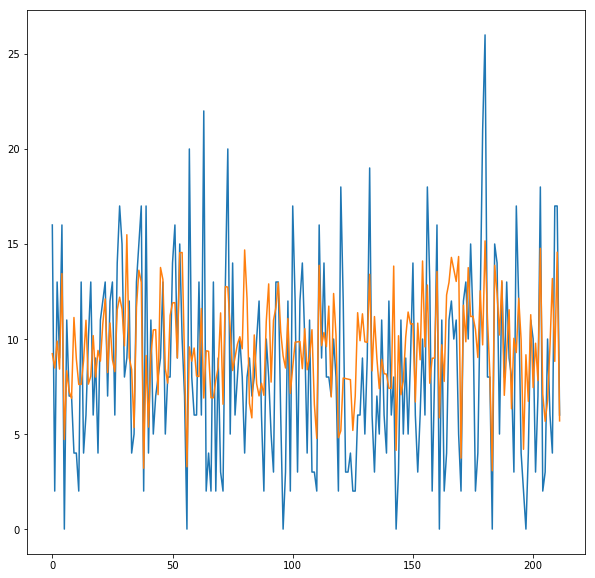

In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(test.PTS.values)
plt.plot(predictions)

In [95]:
delta=test.PTS-predictions
np.abs(np.mean(delta)).round() # mean prediction error

1.0

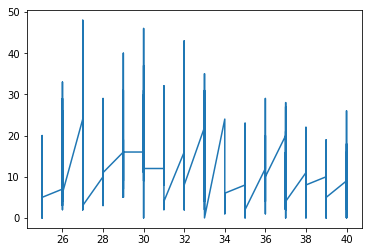

In [96]:
plt.plot(stats.Age, stats.PTS)
plt.show()

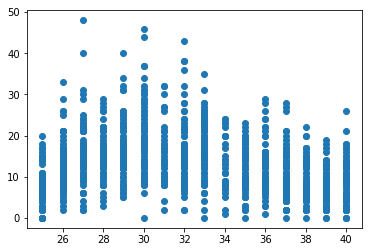

In [100]:
plt.scatter(stats["Age"], stats["PTS"])
plt.show()